



Epoch 1/5


7/7 [==============================] - 3s 101ms/step - loss: 14.6499 - accuracy: 0.5248 - val_loss: 1.4414 - val_accuracy: 0.6000
Epoch 2/5
7/7 [==============================] - 0s 23ms/step - loss: 1.3606 - accuracy: 0.6337 - val_loss: 1.0585 - val_accuracy: 0.6400
Epoch 3/5
7/7 [==============================] - 0s 24ms/step - loss: 0.7527 - accuracy: 0.6485 - val_loss: 0.4165 - val_accuracy: 0.8000
Epoch 4/5
7/7 [==============================] - 0s 26ms/step - loss: 0.5673 - accuracy: 0.7228 - val_loss: 0.4978 - val_accuracy: 0.7600
Epoch 5/5
1/1 [==============================] - 0s 51ms/step - loss: 0.2992 - accuracy: 0.8846
Test Accuracy: 0.8846153616905212


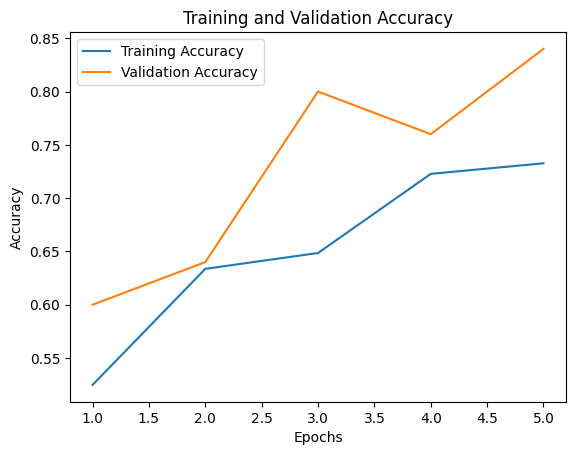

In [1]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers, models


def load_dataset(directory):
    images = []
    labels = []
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        if os.path.isdir(label_dir):
            for filename in os.listdir(label_dir):
                img = tf.keras.preprocessing.image.load_img(os.path.join(label_dir, filename), target_size=(32, 32))
                img_array = tf.keras.preprocessing.image.img_to_array(img)
                images.append(img_array)
                labels.append(label)
    return np.array(images), np.array(labels)

dataset_dir = r"C:\Users\user\OneDrive\Desktop\M_TECH\Sem_02\DLVR\Dataset_Quiz_1_E3\Biomedical_dataset"  
X, y = load_dataset(dataset_dir)


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


X_train, X_temp, y_train, y_temp = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val))

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

import matplotlib.pyplot as plt

# Extracting training and validation accuracy from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plotting the accuracy
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')

# Adding labels and title
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

